# Нормальное распределение

## Импорт необходимых библиотек

In [19]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
from scipy.stats import t, chi2, f

## Задание 1.
Известно, что цена акции X – нормально распределенная случайная
величина X N (50, 4) , где первый параметр это математическое
ожидание, второй – дисперсия. Найти вероятности того, что X примет
значения:
- в интервале (47,55),
- меньшее 49,
- большее 53,
- отличающееся от своего математического ожидания по абсолютной величине не больше чем на 10%.
- сформулировать правило трех сигм для случайной величины X .

In [2]:
mu = 50 # мат. ожидание
sigma = np.sqrt(4)  # стандартное отклонение

# а) Вероятность, что X в интервале (47,55)
p_a = norm.cdf(55, mu, sigma) - norm.cdf(47, mu, sigma)

# б) Вероятность, что X меньше 49
p_b = norm.cdf(49, mu, sigma)

# в) Вероятность, что X больше 53
p_c = 1 - norm.cdf(53, mu, sigma)

# г) Вероятность, что X отличается от мат. ожидания не больше чем на 10%
delta = 0.1 * mu  # 10% от мат. ожидания
p_d = norm.cdf(mu + delta, mu, sigma) - norm.cdf(mu - delta, mu, sigma)

# д) Правило трех сигм для X
rule_3sigma = f"Правило трех сигм для X ~ N({mu}, {sigma**2}):\n" \
              f"• P(μ-σ ≤ X ≤ μ+σ) ≈ 68.27%\n" \
              f"• P(μ-2σ ≤ X ≤ μ+2σ) ≈ 95.45%\n" \
              f"• P(μ-3σ ≤ X ≤ μ+3σ) ≈ 99.73%"

print(f"а) P(47 < X < 55) = {p_a:.4f}")
print(f"б) P(X < 49) = {p_b:.4f}")
print(f"в) P(X > 53) = {p_c:.4f}")
print(f"г) P(|X - μ| ≤ 10%) = {p_d:.4f}")
print("\nд)", rule_3sigma)

а) P(47 < X < 55) = 0.9270
б) P(X < 49) = 0.3085
в) P(X > 53) = 0.0668
г) P(|X - μ| ≤ 10%) = 0.9876

д) Правило трех сигм для X ~ N(50, 4.0):
• P(μ-σ ≤ X ≤ μ+σ) ≈ 68.27%
• P(μ-2σ ≤ X ≤ μ+2σ) ≈ 95.45%
• P(μ-3σ ≤ X ≤ μ+3σ) ≈ 99.73%


## Задание 2.
В инвестиционном портфеле имеется набор ценных бумаг. Их средняя
стоимость равна 100,06 руб. Известно, что 5% ценных бумаг имеют
стоимость меньше 100 руб. Каков процент ценных бумаг, стоимость
которых превышает 94 руб.?

In [6]:
mu = 100.06 # мат. ожидание
p_less_100 = 0.05 # вероятность того, что обнаружим ценную бумагу стоимостью меньше 100 руб.

# Находим sigma по процентилю
sigma = (100 - mu) / norm.ppf(p_less_100)

# Находим процент ценных бумаг стоимостью > 94 руб.
p_more_94 = 1 - norm.cdf(94, mu, sigma)

print(f"Стандартное отклонение: {sigma:.4f}")
print(f"Процент ценных бумаг стоимостью > 94 руб.: {p_more_94*100:.5f}%")

Стандартное отклонение: 0.0365
Процент ценных бумаг стоимостью > 94 руб.: 100.00000%


## Задание 3.
В нормально распределенной совокупности 15% значений имеют
стоимость меньше 12 и 40% – больше 16,2. Найти среднее значение и
стандартное отклонение данного распределения.

In [12]:
def equations(params):
    mu, sigma = params
    eq1 = norm.cdf(12, mu, sigma) - 0.15
    eq2 = 1 - norm.cdf(16.2, mu, sigma) - 0.40
    return [eq1, eq2]

In [13]:
initial_guess = [14, 2]
mu, sigma = fsolve(equations, initial_guess)

In [14]:
print(f"Среднее значение: {mu:.4f}")
print(f"Стандартное отклонение: {sigma:.4f}")

Среднее значение: 15.3750
Стандартное отклонение: 3.2564


## Задание 4.
Даны дневные доходности акции [8,3; 8,6; 8,7; 8,8; 9,1; 9,3; 9,4; 13,4; 13,5;
13,8; 13,9; 14,1; 14,3]. Считая, что выборка произведена из нормальной
генеральной совокупности, найти доверительный интервал для
математического ожидания и среднеквадратического отклонения с
надежностью α = 0,95 .

In [17]:
data = np.array([8.3, 8.6, 8.7, 8.8, 9.1, 9.3, 9.4, 13.4, 13.5, 13.8, 13.9, 14.1, 14.3])
n = len(data)
alpha = 0.95

# Выборочное среднее и стандартное отклонение
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# Доверительный интервал для мат. ожидания
t_critical = t.ppf((1 + alpha)/2, df=n-1)
me_margin = t_critical * sample_std / np.sqrt(n)
ci_mean = (sample_mean - me_margin, sample_mean + me_margin)

# Доверительный интервал для стандартного отклонения
chi2_lower = chi2.ppf((1 - alpha)/2, df=n-1)
chi2_upper = chi2.ppf((1 + alpha)/2, df=n-1)
ci_std = (np.sqrt((n-1)*sample_std**2/chi2_upper), np.sqrt((n-1)*sample_std**2/chi2_lower))

print(f"Выборочное среднее: {sample_mean:.4f}")
print(f"Выборочное стандартное отклонение: {sample_std:.4f}")
print(f"Доверительный интервал для мат. ожидания (95%): ({ci_mean[0]:.4f}, {ci_mean[1]:.4f})")
print(f"Доверительный интервал для ст. отклонения (95%): ({ci_std[0]:.4f}, {ci_std[1]:.4f})")

Выборочное среднее: 11.1692
Выборочное стандартное отклонение: 2.5921
Доверительный интервал для мат. ожидания (95%): (9.6028, 12.7356)
Доверительный интервал для ст. отклонения (95%): (1.8588, 4.2789)


## Задание 5.
Какая из двух акций (данные приведены ниже) выгоднее для инвестора.


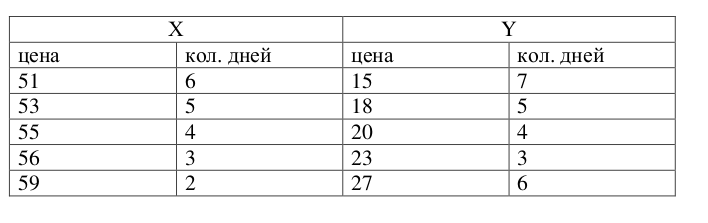

In [20]:
X_prices = [51, 53, 55, 56, 59]
X_days = [6, 5, 4, 3, 2]

Y_prices = [15, 18, 20, 23, 27]
Y_days = [7, 5, 4, 3, 6]

X_values = np.repeat(X_prices, X_days)
Y_values = np.repeat(Y_prices, Y_days)

# Расчет статистик
X_mean = np.mean(X_values)
X_var = np.var(X_values, ddof=1)
X_std = np.std(X_values, ddof=1)
X_cv = (X_std / X_mean) * 100  # Коэффициент вариации в %

Y_mean = np.mean(Y_values)
Y_var = np.var(Y_values, ddof=1)
Y_std = np.std(Y_values, ddof=1)
Y_cv = (Y_std / Y_mean) * 100  # Коэффициент вариации в %

# Проверка гипотезы о равенстве дисперсий (F-критерий)
F = max(X_var, Y_var) / min(X_var, Y_var)
df1 = len(X_values) - 1
df2 = len(Y_values) - 1
p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

# Вывод результатов
print("Акция X:")
print(f"Среднее: {X_mean:.2f}")
print(f"Дисперсия: {X_var:.2f}")
print(f"Стандартное отклонение: {X_std:.2f}")
print(f"Коэффициент вариации: {X_cv:.2f}%\n")

print("Акция Y:")
print(f"Среднее: {Y_mean:.2f}")
print(f"Дисперсия: {Y_var:.2f}")
print(f"Стандартное отклонение: {Y_std:.2f}")
print(f"Коэффициент вариации: {Y_cv:.2f}%\n")

print("Проверка гипотезы о равенстве дисперсий:")
print(f"F-статистика: {F:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Заключение: Дисперсии статистически значимо различаются (p < 0.05)")
else:
    print("Заключение: Нет оснований отвергать гипотезу о равенстве дисперсий (p ≥ 0.05)")

Акция X:
Среднее: 53.85
Дисперсия: 6.56
Стандартное отклонение: 2.56
Коэффициент вариации: 4.75%

Акция Y:
Среднее: 20.24
Дисперсия: 21.44
Стандартное отклонение: 4.63
Коэффициент вариации: 22.88%

Проверка гипотезы о равенстве дисперсий:
F-статистика: 3.2707
p-значение: 0.0069
Заключение: Дисперсии статистически значимо различаются (p < 0.05)


- Проверка гипотезы о равенстве дисперсий показала, что дисперсии доходностей акции стат. значимо отличаются (p-value = 0.0069 < 0.05).
- Акция X является более выгодной для инвестора, так как она демонстрирует более стабильную доходность относительно своего среднего уровня.